# Response Themes for "What aspects of Jupyter Notebook make it difficult to use in your workflow?"

* Goal: Extract theme keywords from `difficult_aspects` responses.
* Data: Output from 2_clean_survey.ipynb notebook (`survey_short_columns.csv`)
* Process from [1_ux_survey_review.ipynb](1_ux_survey_review.ipynb):

> Moving forward, here's a semi-automatic procedure we can follow for identifying themes across questions:
> 1. Take a random sample of question responses
> 2. Write down common theme keywords
> 3. Search back through the responses using the theme keywords
> 4. Expand the set of keywords with other words seen in the search results
> 5. Repeat for all themes and questions
> Later, we can use a fully automated topic modeling approach to validate our manually generated themes.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np

Make sure the samples come up the same for anyone that re-runs this.

In [4]:
rs = np.random.RandomState(123)

In [5]:
pd.set_option('max_colwidth', 1000)

In [6]:
df = pd.read_csv('survey_short_columns.csv')

In [7]:
def show(series):
    '''Make random samples easier to read.'''
    for i, value in enumerate(series):
        print('{}) {}'.format(i, value), end='\n\n')

In [8]:
responses = pd.concat([df.difficult_aspects_1, df.difficult_aspects_2, df.difficult_aspects_3])

In [9]:
assert len(responses) == len(df) * 3

In [10]:
responses.isnull().value_counts()

True     4216
False     902
dtype: int64

In [11]:
responses = responses.dropna()

## Initial Samples

I ran the sampling code below multiple times and manually built up the initial set of keywords seen commonly across them. I formed groups of conceptually related keywords. Then I tried to assign a simple label to each group.

In [12]:
show(responses.sample(20, random_state=rs))

0) runnning notebooks in batch

1) Relatively hard installation, not simply an app

2) would be nice to be able to import one notebook into another

3) Lack of document structure manipulation

4) Terminal mode doesn't handle keyboard shortcuts well

5) Connecting to diverse data sources

6) Code reuse

7) no concrete status info on running calculations (What does my Python process do that has been running for ages now?)

8) Python 3 vs 2 problems

9) Out-of-order execution

10) Package updates

11) Very limited editing facilities (search-and-replace???)

12) Vanilla jupyter notebook is unwieldy with long notebooks (but mitigated by TOC extension, section folding,...)

13) Control over matplotlib graphs still a bit limited and clumsy

14) No emacs-style bindings for editing code

15) Deploying to the cloud requires a brain + setup time. Should be brainless and next to instantaneous

16) Losing state -- restarting the kernel

17) the kernel needs to be restarted to reload modules (though

In [662]:
themes = {
    'ux': ['(manipulating|mov(e|ing)|copy(ing)?) cells|rearranging', 'multi(ple)? cells?', 
           'cells (up and down|out of place)', 
           'mouse', 'right-click', 'tab function',
           'copy(-|&|\sand\s|\/)paste|c&p|and paste', 'double(\s|-)?click(ing)?',
           'modal',  
           'muddle|messy|clutter|clunky',
           '(wasted|screen) space|bloated ui|too much whitespace|margins|width', 
           'scroll(\s)?bar|scroll(ing)?', 
           'jump(ing)?', 'status', 'drag-and', 
           'css|themes?|fonts?|contrast|icons?', 
           'cell.*numbers|numbering|numbered cells|cell ordering', 
            '(u|i)ndo', 'too small',
           'ui feels like 1993', 'more clicks', 'accessibility', 'click on',
           '(fold|collapse) code', 'open notebooks', 'launching the notebook', 
           'hard to navigate', 'small screens|tablet|mobile',
           'print(ing)?', 'hide', 
           'web based|browser'],
    'performance': ['performance', 'slow(er)?', 'cach(e|ing)', ],
    'stability': ['freeze|hang(s|ing)|locks? up|crashes|dying|dies', 
                  'reboot(ing)?|restart(ing)? (notebook|kernel)|kernel restarts', 'kernel died/restarting',
                  'testing', 
                  'brittle|(los(e|ing)|preserve) state|work is lost', 
                   ],
    'versions': ['versions', 'versionn?ing', '3 vs 2', 'v3', 'changing api', 
                 'dependencies|package (updates|management)', 'conda',
                 'software version', 'version upgrades', 'incompatibilities', ],
    'version_control': ['(version|source) (control|management|tracking|history|notebooks)', 'git(hub)?',
                        'control version', 'not versioned', 'version-controlled', 
                         ],
    'hosting': ['deploy(ing)?', 'cloud', 'production', 
                'install(ation)?|(spun\s|setting\s|standing\s|(start|set)(\s|-)?)up', 
                'client-server|server', 
                'host(ed|ing)', 'virtual(env|\senvironment)',
                'resource intensive|memory us(e|age)', 
                'configur(ing|ation)', 'remote access', 'native', 
                'multi-?user', 'single (user|computer)', 'permissions?', 
                'jupyter\s?hub', 'personalization',],
    'documentation': ['doc(s|umentation)?($|\W)', ],
    'editor': [ '(code )?edit(or|ing)(\scode)?', 'linting', 'fold code', 
               '(auto|code\s|tab\s)complet(e|ion)', 'rename all', 'vim?($|\W)|sublime|atom|emacs', 
               'hard to edit', 'multiple curs(o|e)r', 'completion of parenthesis', 
               'key(board|\s?bindings?)|short-?cuts?|hotkeys?', 'key combinations',  ],
    'language': ['python', 'languages?', 'language support', 'R($|\W)',],
    'content_management': ['(file|notebook|content) management', 'file(\s|-)?system',
                           'search(-and-replace)?|find and|finding', 
                           'file (browser|explorer)', 'large files', '(long|large) notebooks?', 
                           'navigation tools', 'where all my notebooks are', 'multiple files', 'structure notebooks', 
                           'managing.*(notebooks|files)', 'split a notebook', 
                           'large projects', 
                           '(folders?|director(y|ies))(\smanagement)?', ],
    'development': ['breakpoints', 'profiling', 'look at all variables', 
                    'development environment', 'tips', 'environment window', 'debug(ger|ging)?(\stools)?', 
                    'loaded variables', 'workspace|ides?($|\W)', 'rstudio|knitr', 
                    'debug errors', 'spell check', 'code structure', 'too much programming', 
                    'namespace|everything is global|bad programming|programming practices',
                    'remain in memory', 'modules', 'transform cells', 'code re-?use', 'variables', 
                    'portability|hard to port|port analysis', 'api',
                    'multiprocessing|parallel (code|programming)', 'code review', 'diff(s|ing)?($|\W)'
                    ],
    'collab': ['collaborat(e|ion)', 'multiple authors', ],
    'dissemination': ['interactivity in charts', 'interactive (widgets|plots)', 'nbconvert',
                      'document conversion',
                      '(dashboard|presentation|"view only") mode', 
                      'non-interactive graphs', 
                      'report generation', 'presentations', 'interactive graphic', 'shar(e|ing)', 
                      'distribution', 'export(ing)?', 'pdf', ],
    'file_format': ['(json|\.py|ipynb) files', 'filesize', 'notebook format', '.ipynb', 'large documents',
                   ], 
}

## Coverage Improvement

I next ran the code below to associate the theme labels with the responses. I then iterated on running the code below to find reponses without labels. I expanded the list of keywords and themes above in order to improve coverage.

In [663]:
import re

In [664]:
def keywords_or(text, keywords):
    for keyword in keywords:
        if re.search('(^|\W+){}'.format(keyword), text, re.IGNORECASE):
            return True
    return False

In [665]:
def tag_themes(data, themes):
    tagged = data.to_frame()
    tagged['themes'] = ''
    for theme, keywords in themes.items():
        results = data.map(lambda text: keywords_or(text, keywords))
        tagged.loc[results, 'themes'] += theme + ','
        print(theme, results.sum())
    return tagged

In [666]:
tagged = tag_themes(responses, themes)
tagged.themes.str.count(',').value_counts()

performance 17
stability 32
development 125
documentation 17
language 43
editor 111
hosting 94
file_format 12
content_management 55
dissemination 51
collab 9
versions 30
ux 169
version_control 70


1    586
0    199
2    104
3     11
4      2
Name: themes, dtype: int64

In [667]:
tagged[tagged.themes.str.len() == 0].sample(20, random_state=rs)

,0,themes
1346,A dev,
816,Notebooks unwieldy as they grow larger,
79,Always looking up help,
808,lack of bookmarks between cells : select cells to be cleaned and rerun,
1035,difficult to keep mutating state under control during iterative development,
1524,Knowledge management,
486,runnning notebooks in batch,
264,not as interactive as ipython console,
499,integration in windows,
916,Huge output -- with a few keystrokes a user can create 100MB's of output in a cell. Nightmare. Jason Grout is working on this I think.,


## Precision Check

I then studied a sample of responses for each theme to see if there major inaccuracies in their application (e.g., string matches that are too fuzzy).

In [668]:
tagged = tag_themes(responses, themes)
tagged.themes.str.count(',').value_counts()

performance 17
stability 32
development 125
documentation 17
language 43
editor 111
hosting 94
file_format 12
content_management 55
dissemination 51
collab 9
versions 30
ux 169
version_control 70


1    586
0    199
2    104
3     11
4      2
Name: themes, dtype: int64

In [669]:
from IPython.display import display, clear_output

In [670]:
# for key in themes:
#     clear_output()
#     size = min([10, len(tagged[tagged.themes.str.contains(key)])])
#     display(tagged[tagged.themes.str.contains(key)].sample(size))
#     if input('Showing `{}`. Type Enter to continue, "q" to stop.'.format(key)) == 'q':
#         break

I also looked at responses with multiple themes to fine tune them, and catch duplication of words in multiple themes.

In [671]:
tagged[tagged.themes.str.count(',') == 2].sample(20, random_state=rs)

,0,themes
312,Need to start the server from a particular directory,"hosting,content_management,"
176,Installation/customization is complicated and up-to-date documentation can be hard to find.,"documentation,hosting,"
786,"Stderr results are not printed immediately, it is hard to monitor progress of long-running tasks (e.g. hyperparameter search in scikit-learn)","content_management,ux,"
1575,"Clunky things getting it setup e.g., the aforementioned security handshaking and such","hosting,ux,"
398,Difficulty to reliably install and use extensions across new ipython/jupyter versions,"hosting,versions,"
711,Integration with git/hg; some users foget to clear outputs which messes up the diffs,"development,version_control,"
1573,Can't hide a groups of cells based on the heading stuctures,"development,ux,"
845,Ipynb files are hard to copy from in plain text editor,"editor,file_format,"
1470,displaying lots of data in scrollable window slows frontend down A LOT,"performance,ux,"
35,"Line numbers in tracebacks don't seem to accurately reflect cell line numbers, which increases debugging difficulty.","development,ux,"


## Keyword Frequencies

In [672]:
import matplotlib
import seaborn

In [673]:
counts = {}

In [674]:
for theme, keywords in themes.items():
    for keyword in keywords:
        hits = responses.map(lambda text: keywords_or(text, [keyword]))
        counts[keyword] = hits.sum()

In [675]:
hist = pd.Series(counts).sort_values()

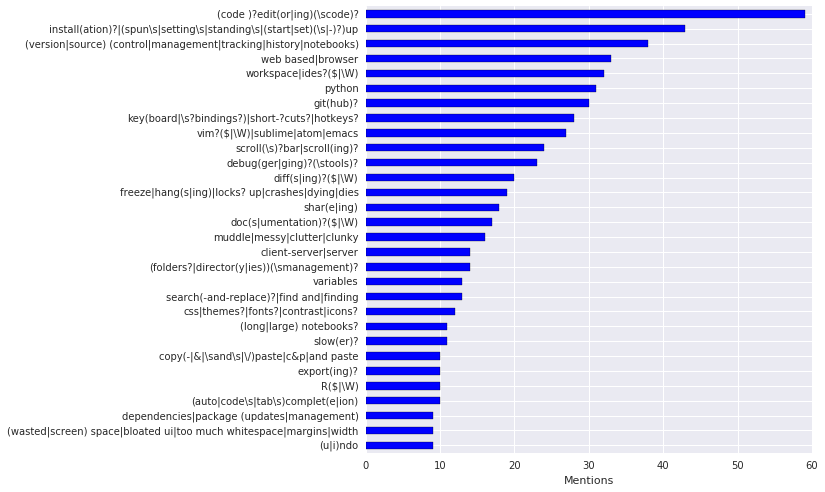

In [676]:
ax = hist[-30:].plot.barh(figsize=(8, 8))
_ = ax.set_xlabel('Mentions')

## Persist

I save off the themes and keywords to a DataFrame with the same index as the original so that the entries can be tagged.

In [677]:
column = 'difficult_aspects'

In [678]:
themes_df = tagged.themes.to_frame()

In [679]:
themes_df = themes_df.rename(columns={'themes' : column+'_themes'})

In [680]:
themes_df[column+'_keywords'] = ''

In [681]:
for theme, keywords in themes.items():
    for keyword in keywords:
        results = responses.map(lambda text: keywords_or(text, [keyword]))
        if not results.sum(): continue
        themes_df.loc[results, column+'_keywords'] += keyword + ','

In [682]:
themes_df[column+'_themes'] = themes_df[column+'_themes'].str.rstrip(',')
themes_df[column+'_keywords'] = themes_df[column+'_keywords'].str.rstrip(',')

Up above, I merged the three response fields for the question into one common pool which means we can have duplicate index value in the themes DataFrame. We need to squash these down and remove duplicates.

In [683]:
def union(group_df):
    '''Gets the set union of themes and keywords for a given DataFrame.'''
    themes = group_df[column+'_themes'].str.cat(sep=',')
    themes = list(set(themes.split(',')))
    themes = ','.join(themes)
    
    keywords = group_df[column+'_keywords'].str.cat(sep=',')
    keywords = list(set(keywords.split(',')))
    keywords = ','.join(keywords)
    return pd.Series([themes, keywords], index=[column+'_themes', column+'_keywords'])

We group by the index and union the themes and keywords.

In [684]:
themes_df = themes_df.groupby(themes_df.index).apply(union)

In [685]:
themes_df.head()

,difficult_aspects_themes,difficult_aspects_keywords
1,development,diff(s|ing)?($|\W)
5,development,"variables,workspace|ides?($|\W)"
6,"hosting,version_control","install(ation)?|(spun\s|setting\s|standing\s|(start|set)(\s|-)?)up,(version|source) (control|management|tracking|history|notebooks)"
7,"dissemination,version_control","report generation,(version|source) (control|management|tracking|history|notebooks)"
10,,


The themes DataFrame should have as many rows as there are non-null responses in the original DataFrame.

In [686]:
assert len(themes_df) == len(df[[column+'_1', column+'_2', column+'_3']].dropna(how='all'))

In [687]:
themes_df.to_csv(column + '_themes.csv', sep=';')